# DSI Module 3 - Team Air Quotes
## Natural Language Processing (NLP)


<img src='https://miro.medium.com/max/960/0*xLRsbQ02J7sQpNNy'>

Image courtesy of ITNEXT

### Team members: Nmeso, Mekondjo, Lali, and Akhil

### Team tutor: Felix



## Goal
In this module, the purpose is the explore and appy NLP. After each team member had come up with at least one idea, it was decided that we would explore and implement a sarcasm detector. 

## Background
The Cambridge English dictionary defines sarcasm as "the use of remarks that clearly mean the opposite of what they say, made in order to hurt someone's feelings or to criticize something in a humorous way" [1].  The Merriam-Webster dictionary defines it as "a sharp and often satirical or ironic utterance designed to cut or give pain" [2]. Not everybody would agree about these definitions, but sarcasm is usually when positive words are used to convey a negative message. Naturally, it differs from person to person and is highly dependent on the culture, gender and many other aspects. 

## Motivation
Especially for beginner learners of any language, identifying sarcasm can remains challenging. Things can be lost in translation, and people can feel hurt unintentiionally. That is why the purpose of a sarcasm detector would help people understand when something is sarcastic and not take it the wrong way. This is why as a baseline, it was decided that we would focus on detecting sarcasm on news headlines as this is a form of widely consumed media. Furthermore, this might be especially applicable in social media circumstances such as on Twitter and Facebook. In the future this could be useful would discriminating between harmful content and witty sentences. 

## Dataset 
The data used for the project was taken from kaggle. There were two JSON files ecah containg the 'is_sarcatic' and 'headlines' columns. The two files were joined to create a bigger data for the analysis. The complete date has 50,000 training examples with the data not significantly imbalanced.
The data can be sourced [here](https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection).

## Recommendations for future works
* More datasets
* Expand to non-headlines
* Hyperparameter fine tuning
* Ensemble model
* Expand to audio
* Multi-channel NLP



## References:
1. https://dictionary.cambridge.org/dictionary/english/sarcasm

2. https://www.merriam-webster.com/dictionary/sarcasm 

3. https://aclanthology.org/D13-1066.pdf

4. https://paperswithcode.com/task/sarcasm-detection

5. https://towardsdatascience.com/sarcasm-detection-with-nlp-cbff1723f69a


### Necessary imports

In [13]:
# from google.colab import drive
# drive.mount('/content/drive')

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Getting the data
concatenate two datasets to increase my datasize or Train one dataset and use the second for cross validataion and test

In [16]:
def concat_dataset(dataset1,dataset2):
    df1= pd.read_json(dataset1, lines= True)
    df2 = pd.read_json(dataset2, lines= True)
    return pd.concat((df1,df2), axis =0, sort =True)

In [17]:
ds1 = '/content/drive/MyDrive/M3/Sarcasm_Headlines_Dataset.json'
ds2 = '/content/drive/MyDrive/M3/Sarcasm_Headlines_Dataset_v2.json'
df = concat_dataset(ds1,ds2)

## Exploratory Data Analysis

> Extract the company from the article link as a feature to determine if certain companies will be prone to have sarcastic headlines

>Check for null values, unique values and correlation

> visualize the data

In [18]:
df = df.reset_index(drop=True)

In [19]:
from urllib.parse import urlparse,urlsplit
from tqdm import tqdm
import time
df['web_page'] = 0
for i in tqdm(range(len(df))):
    address = df['article_link'][i]
    parsed = urlparse(address)
    df['web_page'][i] = parsed.netloc.split('.')[1] 

  0%|          | 0/55328 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
100%|██████████| 55328/55328 [00:01<00:00, 31031.82it/s]


In [20]:
df.isnull().sum()

article_link    0
headline        0
is_sarcastic    0
web_page        0
dtype: int64

In [21]:
df['web_page'].nunique()

2

In [22]:
df['text length'] = df['headline'].apply(len)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


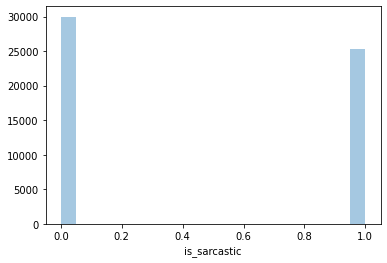

In [23]:
sns.distplot(df['is_sarcastic'], kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


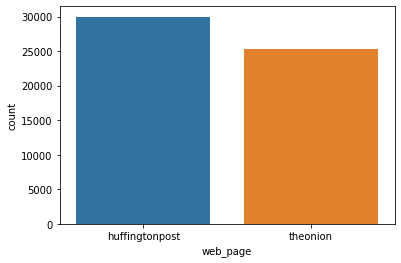

In [24]:
sns.countplot(df['web_page'])

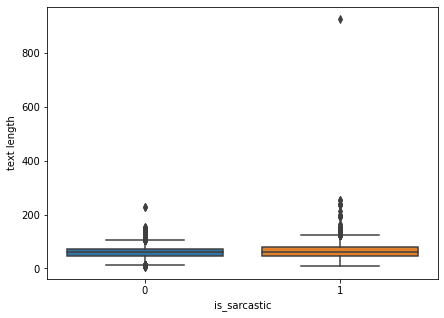

In [25]:
ax =plt.figure(figsize = (7,5))
sns.boxplot(x=df['is_sarcastic'] ,y=df['text length'] ,data = df )

From the Boxplot, there is presence outliers. Finding out if the total count of the outliers to determine if can be dropped without affecting the dataset.

In [26]:
df['text length'].max()

926

In [27]:
df['text length'].sort_values(ascending=False)

34011    926
28855    254
19868    254
43297    238
17306    238
        ... 
22596      8
36829      8
38598      8
55085      7
20551      7
Name: text length, Length: 55328, dtype: int64

In [28]:
df[df['text length']== max(df['text length'])]

,article_link,headline,is_sarcastic,web_page,text length
34011,https://www.theonion.com/hot-wheels-ranked-num...,hot wheels ranked number one toy for rolling d...,1,theonion,926


Since the outlier is just 1 dropping it would not affect the data.

In [29]:
df.drop(axis= 0, index = 7302, inplace=True)

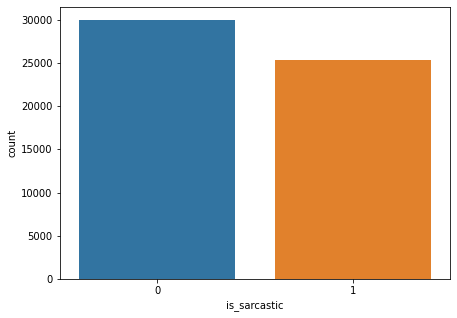

In [30]:
ax =plt.figure(figsize = (7,5))
sns.countplot(x=df['is_sarcastic'] ,data = df )

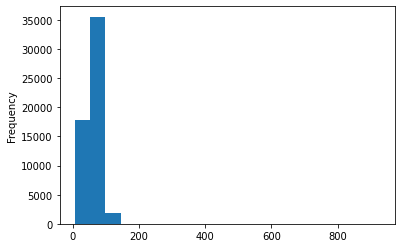

In [31]:
sns.set_style = 'whitegrid'
df['text length'].plot(bins=20, kind='hist')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f2dcc7490>,
      dtype=object)

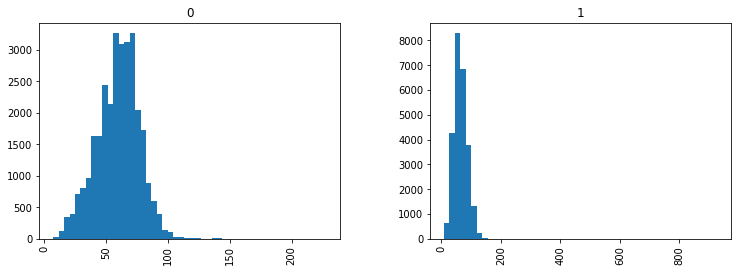

In [32]:
df.hist(column='text length', by='is_sarcastic', bins=50,figsize=(12,4))

This shows that there is trend relating the text lendth to the label. Further taking a .corr() between the columns.

In [33]:
df.corr()

,is_sarcastic,text length
is_sarcastic,1.000000,0.112743
text length,0.112743,1.000000


The two features are poorly correlated so, text length is a good column to drop (I should not have created it in the first instance)

## Text Preprocessing

In [34]:
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Defining a function to apply to the headlines for text processing, the function should
>remove digits and newlines

>remove punctuations

>remove stop words

>return a tokenized output

In [35]:
import spacy
nlp = spacy.load('en_core_web_sm')

def preprocess(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    a_lemmas = [lemma.lower() for lemma in lemmas if lemma.isalpha() and lemma not in stopwords.words('english')]
    lemmatized_text = ' '.join(a_lemmas)
    return lemmatized_text

In [36]:
def text_processing(headline):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text in lower case
    """
    nopunc = ''.join([char for char in headline if char not in string.punctuation])
    nopunc = ''.join([char for char in nopunc if not char.isdigit()])
    clean_text = [word.lower() for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_text

WordCloud is a technique to show which words are the most frequent among the given text. Visualizing the most frequent words from the cleaned text we obtained.

In [ ]:
cleaned_text = []
for text in df['headline']:
    cleaned_text.append(preprocess(text))
df['clean_text'] = cleaned_text

In [ ]:
from wordcloud import WordCloud

def plot_wordcloud(df):
    '''function to plot wordcloud from a given dataframe'''
    plt.figure(figsize = (20,10))
    wc = WordCloud(width = 1500,height = 1000,max_words = 1000).generate(' '.join(word for word in df))
    plt.axis("off")
    plt.title('Wordcloud')
    plt.imshow(wc , interpolation = 'bilinear')

plot_wordcloud(df.clean_text)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

CountVectorizer is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. It creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample. 

For e.g, it would take this list 

document= [ “One Geek helps Two Geeks”, “Two Geeks help Four Geeks”, “Each Geek helps many other Geeks at GeeksforGeeks.”] 

and transform it into:

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20200706061418/table.PNG" srcset="https://media.geeksforgeeks.org/wp-content/uploads/20200706061418/table-660x107.PNG 660w, https://media.geeksforgeeks.org/wp-content/uploads/20200706061418/table-768x125.PNG 768w, https://media.geeksforgeeks.org/wp-content/uploads/20200706061418/table-1024x167.PNG 1024w, https://media.geeksforgeeks.org/wp-content/uploads/20200706061418/table.PNG," sizes="100vw">

although the words are not stored as strings but given a particular index value.


In [ ]:
CV= CountVectorizer(analyzer= text_processing).fit(df['headline'])
#print(len(CV.vocabulary_))
headline_cv = CV.transform(df['headline'])

After the counting, the term weighting and normalization can be done with TF-IDF, using scikit-learn's TfidfTransformer.

In [ ]:
tfidf_transformer = TfidfTransformer().fit(headline_cv)
headline_tfidf = tfidf_transformer.transform(headline_cv)
print(headline_tfidf.shape)

## Splitting the data

In [ ]:
X= headline_tfidf
y =df['is_sarcastic']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=101)

In [ ]:
X.shape

## Model Prediction

### Naive Bayes

In [ ]:
import pickle
from sklearn.pipeline import Pipeline

In [ ]:
 def get_Naive_Bayes_model(X_train, X_test, y_train, y_test):
    NB_model = MultinomialNB()
    NB_model.fit(X_train,y_train)
    prediction= NB_model.predict(X_test)

    # save the model to disk
    filename = 'Naive_Bayes_model.sav'
    pickle.dump(NB_model, open(filename, 'wb'))

    # uncomment the section beneath to load
    
    # load_NB_model = pickle.load(open(filename, 'rb'))
    # result = load_NB_model.score(X_test, y_test)

    print('Confusion_matrix')
    print(confusion_matrix(prediction,y_test))

    print('Classification Report')
    print(classification_report(prediction,y_test))

In [ ]:
get_Naive_Bayes_model(X_train, X_test, y_train, y_test)

In [ ]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer= preprocess)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

Nbmodel = pipeline.fit(df['headline'][:30000],df['is_sarcastic'][:30000])
Nbmodel.predict('True bonding is when you and your friends are all angry about the same thing')

# def prediction(text):
#     text 
#     with open('Naive_Bayes_model.sav','rb') as Nbmodel:
#         savedNB_model = pickle.load(Nbmodel)
        
    # savedNB_model.predict(text)


In [ ]:
samples=[['That\'s just what I needed today!'],
          ['Well, what a surprise.'],
          ['Very good; well done!'],
          ['I love the DSI!'],
          ['Are we done yet?'],
          ['Is it time for your medication or mine?'],
          ["Man Accused of Killing Lawyer Receives a New Attorney"]
        ]
        

for i in samples:
    result = Nbmodel.predict(i)
    print(result)




### Support Vector Machine

In [ ]:
 def get_SVC_model(X_train, X_test, y_train, y_test):
    SVC_model = SVC(gamma='scale')
    SVC_model.fit(X_train,y_train)
    pred= SVC_model.predict(X_test)

    # save the model to disk
    filename = 'SVC_model.sav'
    pickle.dump(SVC_model, open(filename, 'wb'))

    # uncomment the section beneath to load
    
    # load_SVC_model = pickle.load(open(filename, 'rb'))
    # result = load_SVC_model.score(X_test, y_test)


    print('Confusion_matrix')
    print(confusion_matrix(pred,y_test))

    print('Classification Report')
    print(classification_report(pred,y_test))

In [ ]:
get_SVC_model(X_train, X_test, y_train, y_test)

### Logistic Regression

In [ ]:
def get_Log_Reg_model(X_train, X_test, y_train, y_test):
    Log_model = LogisticRegression(solver='saga')
    Log_model.fit(X_train,y_train)
    pred2= Log_model.predict(X_test)
    
    # save the model to disk
    filename = 'Log_Reg_model.sav'
    pickle.dump(Log_model, open(filename, 'wb'))

    # uncomment the section beneath to load.
    
    # load_Log_model = pickle.load(open(filename, 'rb'))
    # result = load_Log_model.score(X_test, Y_test)

    print('Confusion_matrix')
    print(confusion_matrix(pred2,y_test))

    print('Classification Report')
    print(classification_report(pred2,y_test))

In [ ]:
get_Log_Reg_model(X_train, X_test, y_train, y_test)

Among the three different Ml algorithms, Support Vector Machine classifier gives the best performance metric

## Deployment 
### Building the dashboard using Gradio

In [ ]:
# Installing gradio
!pip install gradio

In [ ]:
# Importing necessary libraries
import gradio as gr
import re

In [ ]:
def make_prediction(text):
    '''function to implement selected model, clean some input text, and make a 
    prediction which would integrate with the Gradio web app
    '''
    # cleaning input text
    text = text.encode("ascii", errors="ignore").decode(
        "ascii"
    )  # remove non-ascii, Chinese characters
    text = text.lower()  # lower case
    text = re.sub(r"\n", " ", text)
    text = re.sub(r"\n\n", " ", text)
    text = re.sub(r"\t", " ", text)
    text = text.strip(" ")
    text = re.sub(r"[^\w\s]", "", text)  # remove punctuation and special characters
    text = re.sub(
        " +", " ", text
    ).strip()  # get rid of multiple spaces and replace with a single

    # creating dict to save results
    res_dict = dict({'label': '', 'score': ''})
    test_vec = tfidf_transformer.transform([text])

    # condition to save predction as sarcastic or not
    if svc.predict(test_vec)[0] > 0.5:
      res_dict['score'] = svc.predict(test_vec)[0]
      res_dict['label'] = 'POSITIVE'
    else:
      res_dict['score'] = svc.predict(test_vec)[0]
      res_dict['label'] = 'NEGATIVE'

    # return res_dict['label'], res_dict['score']
    return res_dict['label']

In [ ]:
# Samples of text that can be used directly on the web app for showcasing it
samples=[['Parents Ask If Son Wouldn’t Mind Stopping By To Fix Gaping Void In Their Lives'], # The Onion
          ['The Kardashians Are Back. Why Should We Care?'], # Vice News
          ['Macron hints at compromise over plan to raise retirement age'], # The Guardian
          ['San Diego zoo acquires chinese man'], # The Onion
          ['The DSI rocks!'],
          ['Report: North Korea just enjoys nuclear talks'], # The Onion
          ['Russia\'s invasion of Ukraine is under new management'], # The Economist
          ['Financial Advisor Recommends Fraud']] # The Onion

article = '''
<!DOCTYPE html>
<html>
<body>
<br>
<p>
DSI Module 3 - Team: Air Quotes
</p>
<p><i>Composed of: Nmeso, Mekondjo, Lali, and Akhil</i></p> 
</body>
</html>
'''

gradio_ui = gr.Interface(
    fn= make_prediction,
    title="Sarcasm Detector",
    description="Enter some text and see if the model can evaluate sarcasm correctly. <br> \
    Some sample texts can be selected below.",
    theme = 'huggingface',
    examples = samples,
    article = article,
    inputs=gr.inputs.Textbox(lines=10, label="Enter some text here:"),
    outputs=[
        gr.outputs.Textbox(label="Sarcasm Label")#,
        #gr.outputs.Textbox(label="Sarcasm Score"),
    ],
)

In [ ]:
# Launching the dashboard. The link works for 24 hours and as long as your notebook is running
gradio_ui.launch(debug=True, share=True)